#데이터 설명

lonesize m2 -필드의 평균 블루베리 클론 크기

Honeybee bees/m2/min -벌판의 꿀벌 밀도

Bumbles bees/m2/min -벌밭의 벌 밀도

Andrena bees/m2/min -현장의 Andrena bee 밀도

Osmia bees/m2/min -현장 내 Osmia bee 밀도

MaxOfUpperTRange ℃ -개화기 상층대 일 기온 최고 기록

MinOfUpperTRange ℃ -상층대 일 기온 최저 기록

AverageOfUpperTRange ℃ -상층대 일평균기온

MaxOfLowerTRange ℃ -하부밴드 일 기온 최고 기록

MinOfLowerTRange ℃ -하한선 일 기온 최저 기록

AverageOfLowerTRange ℃ -하부밴드 일평균기온

RainingDays Day -개화기 동안 각 강수량이 0보다 큰 총 일 수

AverageRainingDays Day- 전체 개화기의 평균 비 오는 날

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(8)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
5,5,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.565239,0.484350,40.555019,7267.28344
6,6,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.498730,0.442193,35.517539,5739.68029
7,7,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.619888,0.529502,42.191013,7920.06175


## Data Info

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [5]:
train.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15289.0,7644.000000,4413.698468,0.000000,3822.000000,7644.000000,11466.000000,15288.000000
clonesize,15289.0,19.704690,6.595211,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15289.0,0.389314,0.361643,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15289.0,0.286768,0.059917,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,15289.0,0.492675,0.148115,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15289.0,0.592355,0.139489,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15289.0,82.169887,9.146703,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15289.0,49.673281,5.546405,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15289.0,68.656256,7.641807,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,15289.0,59.229538,6.610640,50.200000,55.800000,62.000000,62.000000,68.200000


## EDA

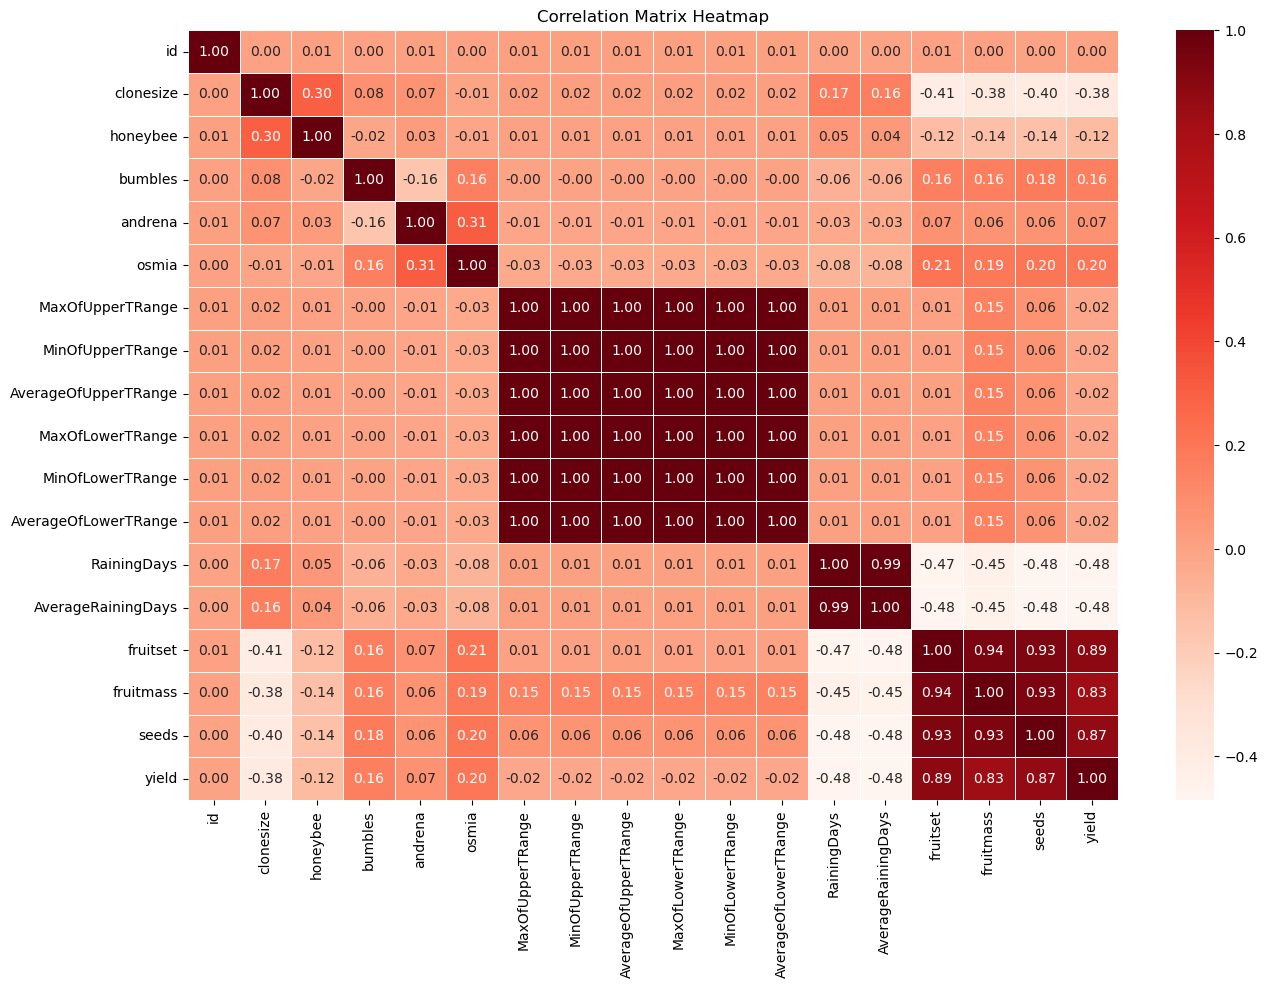

In [7]:
#yield에 영향을 끼치는 요소가 어떤게 있는지 확인하기 위한 상관관계 분석

correlation_matrix = train.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [8]:
#기온에 대한 요소들끼리, 열매와 씨앗과 관련된 컬럼들끼리 상관관계를 가진다

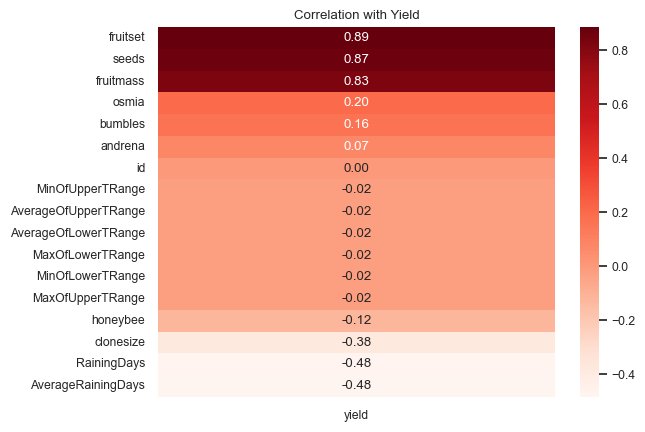

In [9]:
#yield 컬럼을 기준으로만 상관관계를 확인

corr = train.corr()
target_corr = corr['yield'].drop('yield')

target_corr_sorted = target_corr.sort_values(ascending=False) #내림차순

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("Reds")
sns.heatmap(target_corr_sorted.to_frame(), cmap="Reds", annot=True, fmt='.2f')
plt.title('Correlation with Yield')
plt.show()

In [10]:
#개화 시기의 온도나 비오는 날의 수보다는 
#꽃에서 열매를 맺는 단계, 씨앗의 개수, 과실의 질량이나 무게 등과 큰 상관관계를 가진다

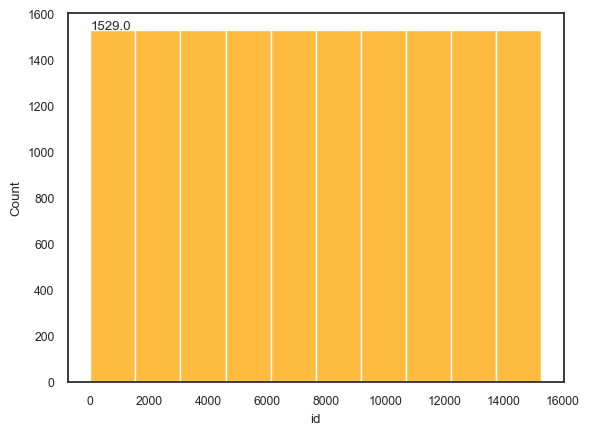

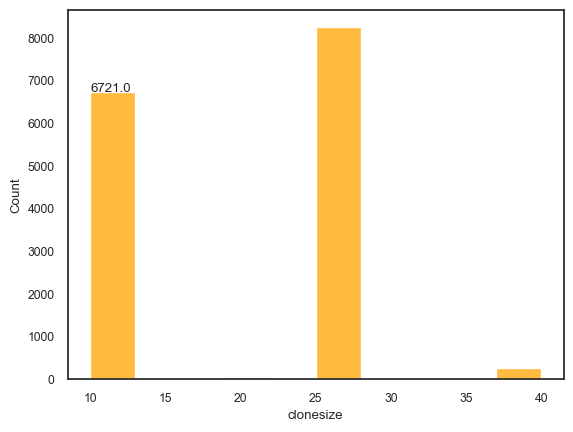

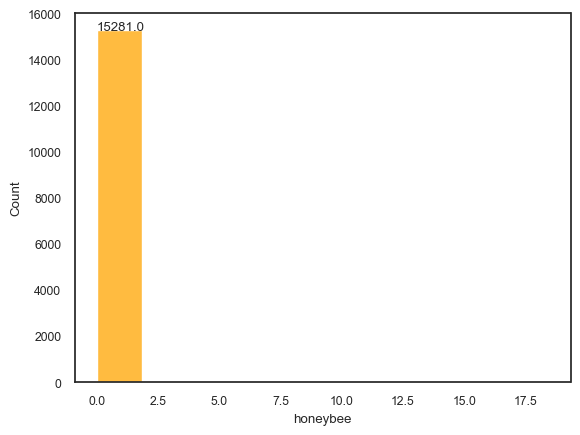

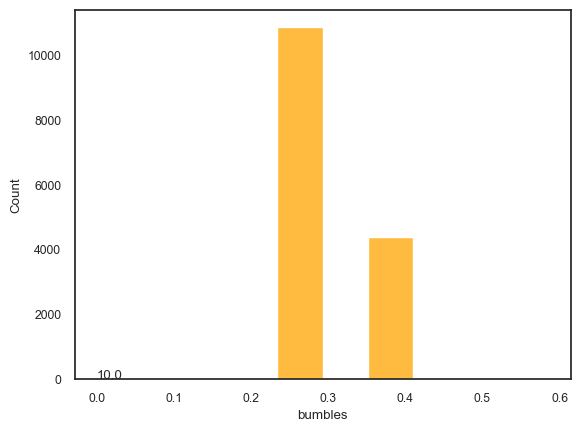

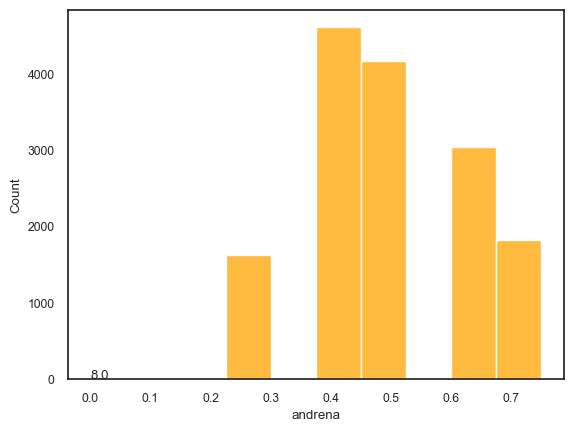

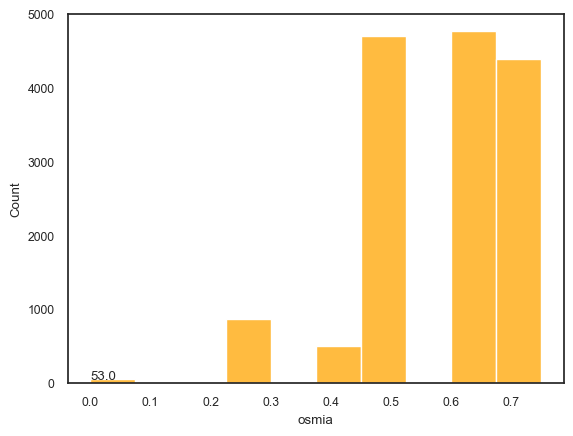

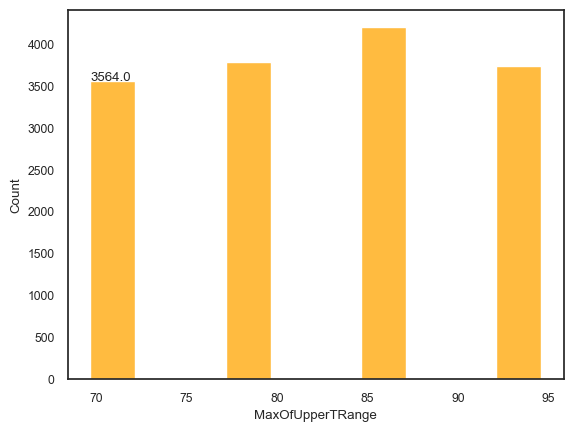

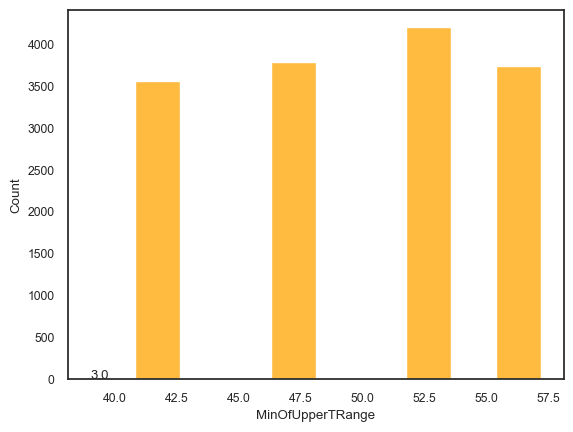

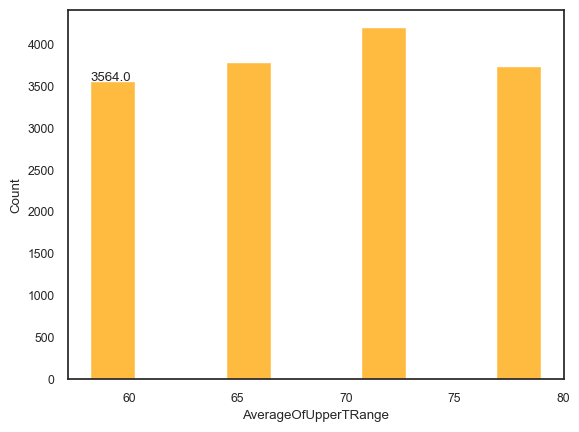

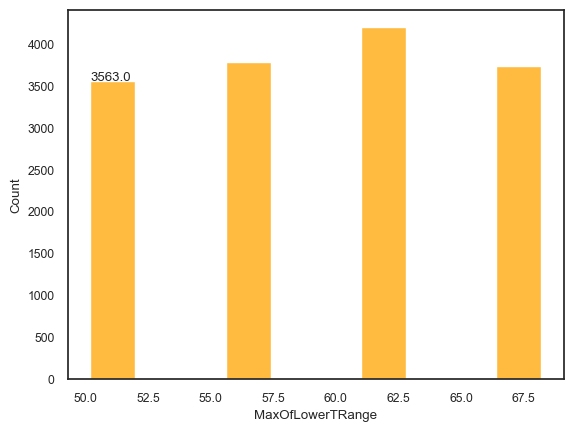

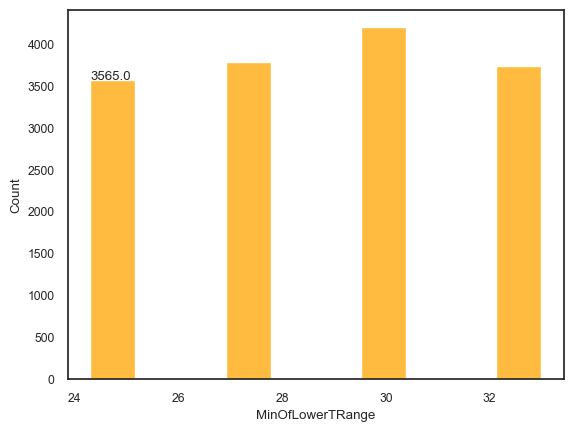

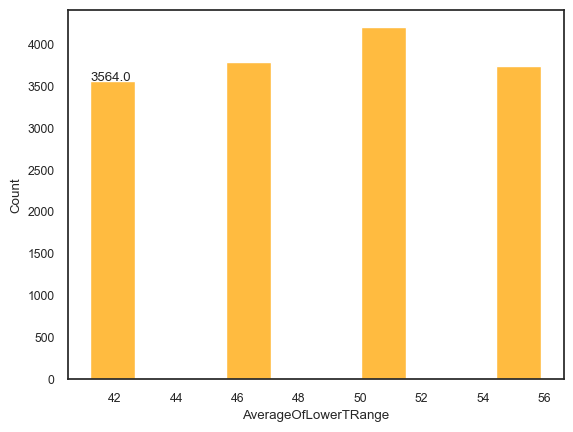

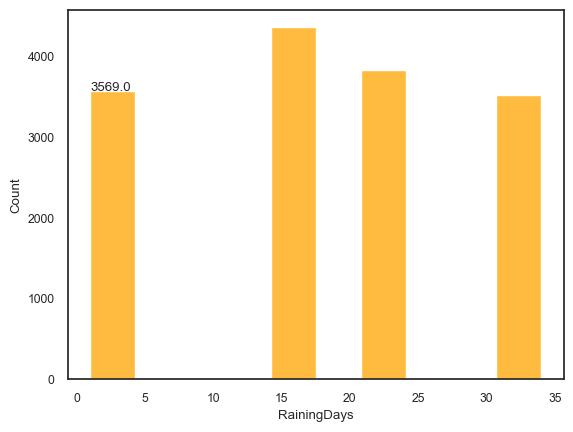

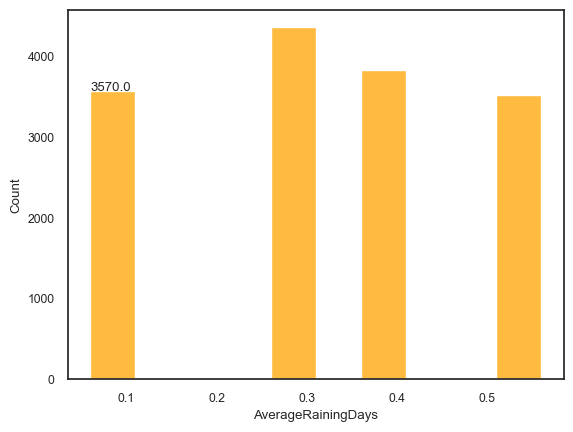

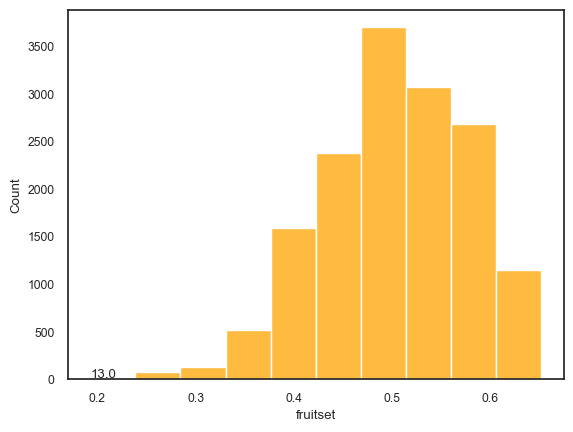

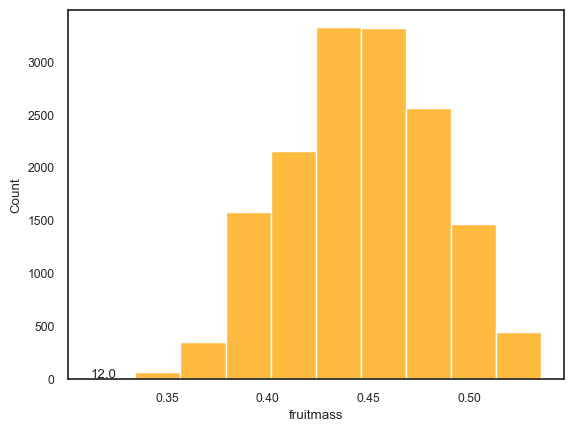

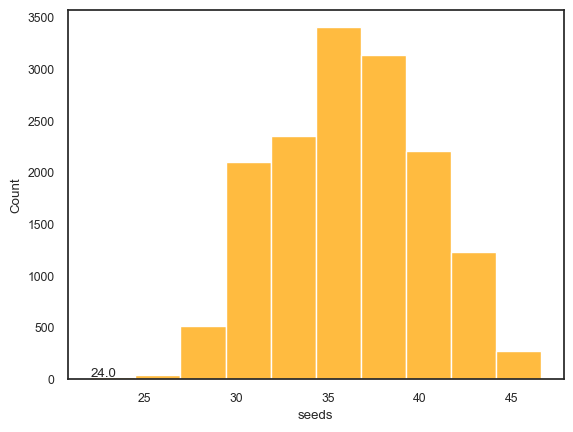

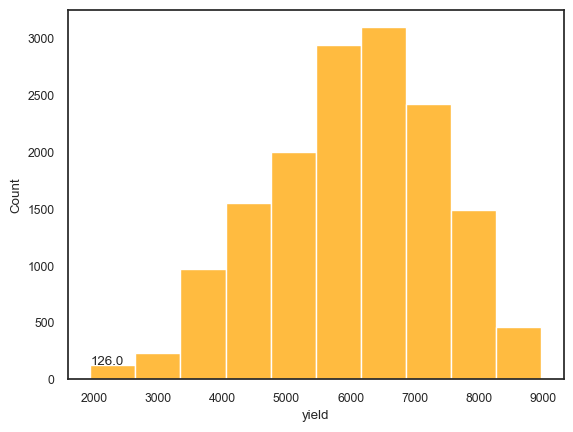

In [11]:
#train 데이터 지표 visualization

def create_histplot(x, data):
    ax = sns.histplot(x=x, data=data, color="orange", bins=10)
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+4))
        plt.show()
        
features = train.columns

for feature in features:
    create_histplot(x=feature, data=train)

## Modeling

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

In [ ]:
#1차

In [13]:
import catboost as ctb

In [57]:
#catboost의 장점/특징

# GBM의 치명적인 문제점 중 하나로 과적합 문제. 
# 이 과적합 문제를 해결하면서 동시에 기존 GBM계열의 알고리즘인 XGBoost, LightGBM 알고리즘보다 학습 속도를 개선하는 장점을 앞세워 개발되었습니다.

# LightGBM은 DFS(깊이 우선 탐색)처럼 트리를 우선적으로 깊게 형성하는 방식을 취하며, 
# XGBoost는 BFS(너비 우선 탐색)처럼 우선적으로 넓게 트리를 형성하게 됩니다. 
# CatBoost도 XGBoost처럼 BFS 방식 즉, level-wise 방식으로 트리를 형성하나 Feature를 모두 동일하게 대칭적인 트리 구조로 형성하게 됩니다. 
# 이런 방식을 통해 예측 시간을 감소시키게 됩니다.

In [14]:
train = pd.read_csv('train.csv')

In [15]:
#Split data
X = train.drop(columns=['yield'])
y = train['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=42)

In [16]:
#Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = ctb.CatBoostRegressor(loss_function='MAE', iterations=1000, learning_rate=0.05, random_seed=42, verbose=False)
model.fit(X_train, y_train)
preds_val = model.predict(X_test)
mae = mean_absolute_error(y_test, preds_val)
print("MAE:", mae)

MAE: 341.5885633257915


### Feature Importances

In [18]:
importances = pd.DataFrame(data = {
    'Attribute' : X.columns,
    'Importance' : model.get_feature_importance()
})

importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
14,fruitset,45.167902
16,seeds,30.103790
15,fruitmass,11.523872
0,id,2.420964
12,RainingDays,1.426914
13,AverageRainingDays,1.165670
4,andrena,1.091776
1,clonesize,1.072256
5,osmia,1.009633
9,MaxOfLowerTRange,0.820094


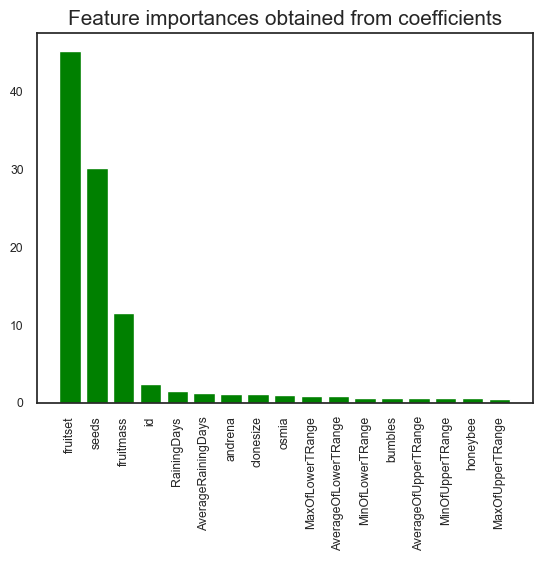

In [19]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='green')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
#submission

test = pd.read_csv('test.csv')

X= test.drop(columns=['id'])
final_prediction = model.predict(X)
final_test = pd.DataFrame({'id':test['id'], 'yield':final_prediction})
final_test

#train과 test의 컬럼수가 동일하지 않아서 생기는 이슈라고 생각됨

CatBoostError: /Users/zomb-ml-platform-msk/go-agent-21.2.0/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:72: Feature 16 is present in model but not in pool.

In [ ]:
#2차

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [25]:
#Optimization

def xgb_objective(trial):
    # .suggest_int - 정수형 하이퍼파라미터를 특정 값 사이에서 추천받을 수 있다
    # 추천받은 값을 모델의 학습 과정에 적용하여 성능을 평가한다
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    subsample = trial.suggest_float("subsample", 0.5, 1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1)
    # shift+tab 으로 여러가지 속성 확인 가능
    
    model = XGBRegressor(
        n_estimators = n_estimators,
        learning_rate = learning_rate,
        max_depth = max_depth,
        subsample = subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

def catboost_objective(trial):
    iterations = trial.suggest_int("iterations", 100, 500)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2)
    depth = trial.suggest_int("depth", 3, 10)
    l2_leaf_reg = trial.suggest_int("l2_leaf_reg", 1, 9)
    subsample = trial.suggest_float("subsample", 0.5, 1)

    model = CatBoostRegressor(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        subsample=subsample,
        random_state=42,
        verbose=0
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

In [ ]:
!pip install optuna

In [26]:
# Run Optuna optimization for each model

from optuna.samplers import TPESampler
import optuna

sampler = TPESampler(seed=42)
# TPESampler를 생성할 때 시드 값을 임의로 42로 설정하고, 이를 통해 하이퍼파라미터 탐색 과정에서 난수를 제어하고 재현성을 확보합니다. 
# 이는 실험을 반복하거나 결과를 공유할 때 유용

xgb_study = optuna.create_study(direction="maximize", sampler=sampler)
xgb_study.optimize(xgb_objective, n_trials=50) 

catboost_study = optuna.create_study(direction="maximize", sampler=sampler)
catboost_study.optimize(catboost_objective, n_trials=50) 

# Print best hyperparameters for each model from Optuna
print("Best parameters for XGBoost from Optuna: ", xgb_study.best_params)
print("Best parameters for CatBoost from Optuna: ", catboost_study.best_params)

[I 2023-07-14 13:12:17,377] A new study created in memory with name: no-name-8732a5e8-a9f0-4643-9fb2-f1b3ab60d50d
[I 2023-07-14 13:12:19,526] Trial 0 finished with value: 0.8065645345667196 and parameters: {'n_estimators': 250, 'learning_rate': 0.19063571821788408, 'max_depth': 8, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182}. Best is trial 0 with value: 0.8065645345667196.
[I 2023-07-14 13:12:21,362] Trial 1 finished with value: 0.7986024067601654 and parameters: {'n_estimators': 162, 'learning_rate': 0.021035886311957897, 'max_depth': 9, 'subsample': 0.8005575058716043, 'colsample_bytree': 0.8540362888980227}. Best is trial 0 with value: 0.8065645345667196.
[I 2023-07-14 13:12:22,441] Trial 2 finished with value: 0.8080390412478621 and parameters: {'n_estimators': 108, 'learning_rate': 0.19428287191077892, 'max_depth': 9, 'subsample': 0.6061695553391381, 'colsample_bytree': 0.5909124836035503}. Best is trial 2 with value: 0.8080390412478621.
[I 2023-07-14 1

[I 2023-07-14 13:13:17,140] Trial 28 finished with value: 0.8204876930167551 and parameters: {'n_estimators': 397, 'learning_rate': 0.05964884537862709, 'max_depth': 6, 'subsample': 0.5997042287500796, 'colsample_bytree': 0.6774693826671467}. Best is trial 27 with value: 0.8273482942323084.
[I 2023-07-14 13:13:18,762] Trial 29 finished with value: 0.8238997082157251 and parameters: {'n_estimators': 264, 'learning_rate': 0.0816381275227504, 'max_depth': 5, 'subsample': 0.7703838975578557, 'colsample_bytree': 0.7472550342898678}. Best is trial 27 with value: 0.8273482942323084.
[I 2023-07-14 13:13:19,987] Trial 30 finished with value: 0.8240875471960689 and parameters: {'n_estimators': 351, 'learning_rate': 0.03773884962849862, 'max_depth': 3, 'subsample': 0.664034114352621, 'colsample_bytree': 0.6332395074528492}. Best is trial 27 with value: 0.8273482942323084.
[I 2023-07-14 13:13:22,142] Trial 31 finished with value: 0.8269356864827535 and parameters: {'n_estimators': 441, 'learning_r

[I 2023-07-14 13:14:32,168] Trial 7 finished with value: 0.8227575277895498 and parameters: {'iterations': 230, 'learning_rate': 0.1486251738842322, 'depth': 8, 'l2_leaf_reg': 8, 'subsample': 0.7361074625809747}. Best is trial 1 with value: 0.8241990712161369.
[I 2023-07-14 13:14:32,791] Trial 8 finished with value: 0.8215862034629015 and parameters: {'iterations': 147, 'learning_rate': 0.14551650957236906, 'depth': 9, 'l2_leaf_reg': 6, 'subsample': 0.8854835899772805}. Best is trial 1 with value: 0.8241990712161369.
[I 2023-07-14 13:14:33,321] Trial 9 finished with value: 0.822182411585736 and parameters: {'iterations': 298, 'learning_rate': 0.10931923758257887, 'depth': 6, 'l2_leaf_reg': 1, 'subsample': 0.5539457134966522}. Best is trial 1 with value: 0.8241990712161369.
[I 2023-07-14 13:14:33,501] Trial 10 finished with value: 0.7448159844639708 and parameters: {'iterations': 109, 'learning_rate': 0.012739629027283298, 'depth': 5, 'l2_leaf_reg': 3, 'subsample': 0.5080976720599699}. 

[I 2023-07-14 13:15:08,829] Trial 39 finished with value: 0.8234309584895204 and parameters: {'iterations': 248, 'learning_rate': 0.024939829457026094, 'depth': 9, 'l2_leaf_reg': 6, 'subsample': 0.6290597624647083}. Best is trial 31 with value: 0.8257960759679162.
[I 2023-07-14 13:15:09,701] Trial 40 finished with value: 0.8238929987012761 and parameters: {'iterations': 383, 'learning_rate': 0.02379910263305657, 'depth': 7, 'l2_leaf_reg': 8, 'subsample': 0.5498252429449146}. Best is trial 31 with value: 0.8257960759679162.
[I 2023-07-14 13:15:11,009] Trial 41 finished with value: 0.8253799170134622 and parameters: {'iterations': 478, 'learning_rate': 0.04039578145235879, 'depth': 8, 'l2_leaf_reg': 6, 'subsample': 0.6624561973751358}. Best is trial 31 with value: 0.8257960759679162.
[I 2023-07-14 13:15:12,291] Trial 42 finished with value: 0.8248844498219174 and parameters: {'iterations': 481, 'learning_rate': 0.03445043353259111, 'depth': 8, 'l2_leaf_reg': 5, 'subsample': 0.64784492487

Best parameters for XGBoost from Optuna:  {'n_estimators': 389, 'learning_rate': 0.035678777150980535, 'max_depth': 4, 'subsample': 0.6636251126351358, 'colsample_bytree': 0.7718599399235944}
Best parameters for CatBoost from Optuna:  {'iterations': 414, 'learning_rate': 0.06061463718467027, 'depth': 8, 'l2_leaf_reg': 5, 'subsample': 0.6193461269394552}


## Machine Learning

In [27]:
#best parameters를 사용해서 설정해주기
xgb_best_params = {'n_estimators': 389, 'learning_rate': 0.035678777150980535, 'max_depth': 4, 'subsample': 0.6636251126351358, 'colsample_bytree': 0.7718599399235944}
catboost_best_params = {'iterations': 414, 'learning_rate': 0.06061463718467027, 'depth': 8, 'l2_leaf_reg': 5, 'subsample': 0.6193461269394552}

#Train base models with the best parameters
xgb = XGBRegressor(**xgb_best_params, random_state=42)
catboost = CatBoostRegressor(**catboost_best_params, random_state=42, verbose=0)

In [28]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# SelectKBest 변환기 - 주어진 특성들 중에서 최상의 k개 특성을 선택하기 위한 것
# f_regression - 특성의 중요도를 평가하는 함수
selector = SelectKBest(score_func=f_regression, k=16)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [29]:
from sklearn.ensemble import VotingRegressor

# Combine the base models to create an ensemble and assign weights
weights = [0.5, 0.5]
# Combine the base models to create an ensemble
ensemble = VotingRegressor([('xgb', xgb),('catboost', catboost)])
# Train the ensemble model using selected features
ensemble.fit(X_train_selected, y_train)

# VotingRegressor는 누가 더 좋은가에 대한 것이 아닌, 각 결과값에 가중치를 곱해서 안 좋은 결과를 가진 모델까지도 여러개를 합쳐서 더 좋은 모델을 만드는 작업

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.7718599399235944,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.035678777150980535,
                                          max_bin=None, max_cat_

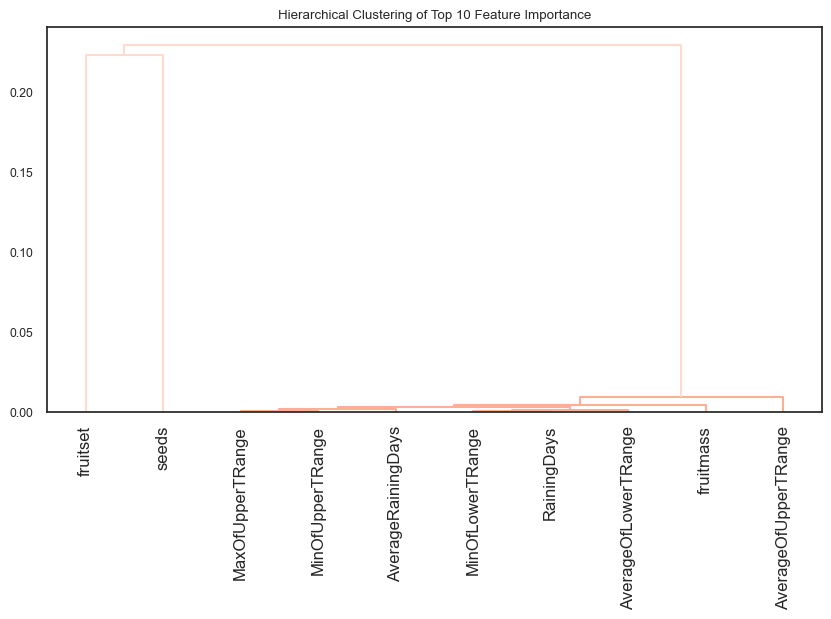

In [30]:
# Top Features 알아보기

# best parameter 기준으로
best_xgb = XGBRegressor(**xgb_study.best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# get feature importance
importances = best_xgb.feature_importances_
top_n = 10 #top10개 알아보기

data = train.copy()
sorted_idx = np.argsort(importances)[-top_n:]
top_features = data.columns[:-1][sorted_idx].tolist()

# 계층 군집도 그리기 위한 Link -> 계층적 군집 등에서 활용
from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(np.array(importances[sorted_idx]).reshape(-1, 1), 'single')

# 도식화하기
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=top_features, orientation='top', distance_sort='descending')
plt.title("Hierarchical Clustering of Top {} Feature Importance".format(top_n))
plt.xticks(rotation=90) 
plt.show()

#위에 사용한 importance 구하는 방식이 더 좋음!

### Cross Validation 교차검증

In [31]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(ensemble, X_train_selected, y_train, cv=kfold, scoring='r2')

print("Cross-validation scores: ", cv_scores)
print("Mean CV R-squared: {:.2f}".format(np.mean(cv_scores)))
print("Standard Deviation of CV R-squared: {:.2f}".format(np.std(cv_scores)))

Cross-validation scores:  [0.79507076 0.82747336 0.82376339 0.84205168 0.81976086]
Mean CV R-squared: 0.82
Standard Deviation of CV R-squared: 0.02


In [32]:
# selected features y_pred 만들기
y_pred = ensemble.predict(X_test_selected)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Mean Squared Error: 304278.03
R-squared: 0.83


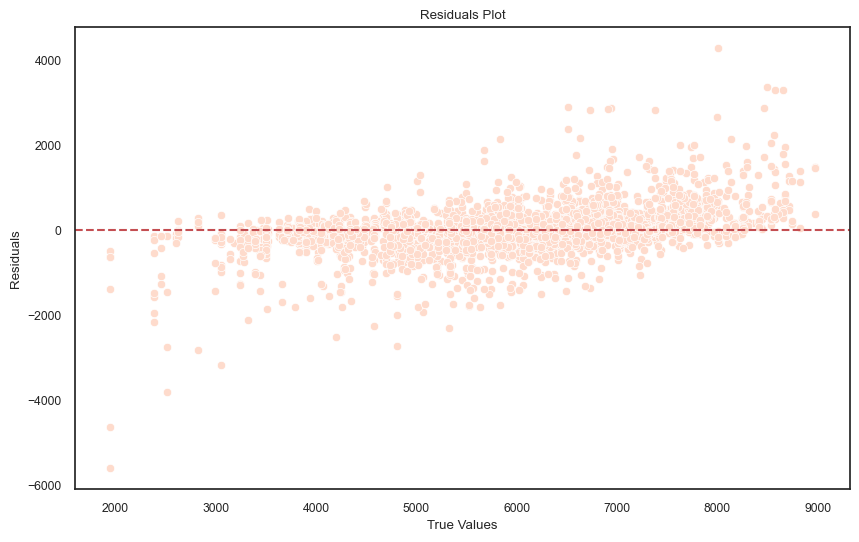

In [33]:
# Residuals plot
# 잔차는 실제 값과 예측 값 사이의 차이이며, 이를 그래프로 표현하여 모델의 예측 성능과 잔차의 패턴을 시각적으로 확인하는 데 도움
# 적합도, 이상치, 비선형성 등을 확인한다

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

## Apply on test data

In [58]:
test = pd.read_csv("test.csv")

In [59]:
selected_features = test.drop('id', axis=1).columns

X_test = test[selected_features]

In [60]:
print(X.shape)

(10194, 16)


In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# Scale
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_test_pred = ensemble.predict(X_test_scaled)

In [66]:
result_df = pd.DataFrame({'id': test['id'], 'yield': y_test_pred})
result_df

,id,yield
0,15289,4340.277090
1,15290,6202.263394
2,15291,7253.406748
3,15292,4748.353331
4,15293,3698.951038
...,...,...
10189,25478,5460.200850
10190,25479,5677.573217
10191,25480,6522.952798
10192,25481,4443.101360
